The focus of the following programming involves the finding of words associated with a key word which would allow one to make associations regarding caring for patients. Here the key word is telemedicine. Our goal is to determine any other words that are associated with telemedicine which could indicate other issues to take into consideration. Tweets were the source of this data set however patient communications with the physicians could provide the data set to perform a more focused study of patient concerns.

In [2]:
import numpy as np 
import pandas as pd
import nltk

In [3]:
# The first step is to clean and preprocess the data.
# Read data file and drop duplicates.
data = pd.read_csv(r'https://raw.githubusercontent.com/DavidNNussbaum/Keyword-Associations/master/data.csv', 
                    engine='python', error_bad_lines=False, encoding='utf-8')   
data = data.drop_duplicates(subset='Tweet') 
data.head()

,Tweet
0,breaking we have therefore made the assessm...
1,these are simple steps to protect yourself ...
2,so here s my personal coronavirus story my s...
3,hasta el momento estas son las universidade...
4,fr urgent donovan mitchell joueur de l uta...


In [4]:
# Take only the Tweet column from the dataframe.
data = data[['Tweet']]
data.head()

,Tweet
0,breaking we have therefore made the assessm...
1,these are simple steps to protect yourself ...
2,so here s my personal coronavirus story my s...
3,hasta el momento estas son las universidade...
4,fr urgent donovan mitchell joueur de l uta...


In [5]:
# Remove mentions, links and hasgtags.
import re

new_list = []
content_list = list(data['Tweet'])

for content in content_list:
    sentence = content.split(" ")
    new_string = " "
    for word in sentence:
        words = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",word).split())
        new_string = new_string + " " + words
    sent = ' '.join(words) 
    new_list.append(new_string)
data['Tweet'] = new_list

data.head()

,Tweet
0,breaking we have therefore made the asses...
1,these are simple steps to protect yoursel...
2,so here s my personal coronavirus story my...
3,hasta el momento estas son las universida...
4,fr urgent donovan mitchell joueur de l u...


In [6]:
# Convert text into lower case.
data["Tweet"] = data['Tweet'].str.lower()
data.head()

,Tweet
0,breaking we have therefore made the asses...
1,these are simple steps to protect yoursel...
2,so here s my personal coronavirus story my...
3,hasta el momento estas son las universida...
4,fr urgent donovan mitchell joueur de l u...


In [7]:
# Remove rt from the data.
data["Tweet"] = data['Tweet'].str.replace('rt ','')
data.head()

,Tweet
0,breaking we have therefore made the asses...
1,these are simple steps to protect yoursel...
2,so here s my personal coronavirus story my...
3,hasta el momento estas son las universida...
4,fr urgent donovan mitchell joueur de l u...


In [8]:
# Remove accented keywords.
data["Tweet"] = data['Tweet'].str.normalize('NFKD')\
       .str.encode('ascii', errors='ignore')\
       .str.decode('utf-8')

In [9]:
# Remove irrelevant characters other than alphanumeric and space.
data['Tweet']=data['Tweet'].str.replace('[^A-Za-z0-9\s]+', '')
data.head()

,Tweet
0,breaking we have therefore made the asses...
1,these are simple steps to protect yoursel...
2,so here s my personal coronavirus story my...
3,hasta el momento estas son las universida...
4,fr urgent donovan mitchell joueur de l u...


In [10]:
# Remove numbers from string.
data['Tweet'] = data['Tweet'].str.replace('\d+', '')
data.head()

,Tweet
0,breaking we have therefore made the asses...
1,these are simple steps to protect yoursel...
2,so here s my personal coronavirus story my...
3,hasta el momento estas son las universida...
4,fr urgent donovan mitchell joueur de l u...


In [11]:
# Tokenize the data.
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

tokenized_data = data['Tweet'].apply(word_tokenize)
tokenized_data

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0      [breaking, we, have, therefore, made, the, ass...
1      [these, are, simple, steps, to, protect, yours...
2      [so, here, s, my, personal, coronavirus, story...
3      [hasta, el, momento, estas, son, las, universi...
4      [fr, urgent, donovan, mitchell, joueur, de, l,...
                             ...                        
729    [these, are, the, suggestions, from, the, u, s...
730    [stay, safe, coronavirusuk, coronavirus, stays...
731    [yoshiki, x, nobel, prize, laureate, in, physi...
732    [whit, is, speakerpelosi, just, drunk, or, is,...
733    [forensic, med, the, data, are, consistent, wi...
Name: Tweet, Length: 734, dtype: object

In [12]:
# Lemmatize the data.
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return [wordnet_lemmatizer.lemmatize(w) for w in word_tokenize(text)]

data['lemmatized_text'] = data.Tweet.apply(lemmatize_text)
data.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Tweet,lemmatized_text
0,breaking we have therefore made the asses...,"[breaking, we, have, therefore, made, the, ass..."
1,these are simple steps to protect yoursel...,"[these, are, simple, step, to, protect, yourse..."
2,so here s my personal coronavirus story my...,"[so, here, s, my, personal, coronavirus, story..."
3,hasta el momento estas son las universida...,"[hasta, el, momento, estas, son, la, universid..."
4,fr urgent donovan mitchell joueur de l u...,"[fr, urgent, donovan, mitchell, joueur, de, l,..."


In [13]:
# Remove stop words and vectorize the data. Print the vocabulary.
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

extra_stop_words = ['coronavirus', 'http'] 
stop_words = stopwords.words('english') + stopwords.words('french') + stopwords.words('spanish') + extra_stop_words 
tfidf = TfidfVectorizer(encoding='utf-8', stop_words=stop_words)
features = tfidf.fit_transform(data['Tweet'].astype(str))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Look at the shape of the data.

print('There are a total of',len(data), 'Tweets in the dataset')
print('There are a total of',len(tfidf.vocabulary_), 'words in the vocabulary')
print('The index of "telemedicine" is',tfidf.vocabulary_['telemedicine'])

There are a total of 734 Tweets in the dataset
There are a total of 5453 words in the vocabulary
The index of "telemedicine" is 4813


In [15]:
# Finding the index of the word by looking it up in the tfidf.vocabulary_:

tfidf.vocabulary_['telemedicine']

4813

In [17]:
# This is a reverse look up locate a word by its index using a dictionary comprehension.Note that the index number changes ehen the program is rerun.

word_by_index = {tfidf.vocabulary_[key]:key for key in tfidf.vocabulary_.keys() }
print('The word at index 4813 in the vocabulary is',word_by_index[4813])

The word at index 4813 in the vocabulary is telemedicine


In [18]:
# Determine how often a key word appears.
word = 'telemedicine'
def count_occurrences(word, tweets_cleaned_str):  #to iterate through all tweets.
    idxs = []
    for i, tweet in enumerate(tweets_cleaned_str): # enumerate keeps indexes of telemedicine
        if word in tweet:
            idxs.append(i)
    return idxs 
word_idx = count_occurrences(word, tokenized_data) # Says how many times a particular word appears
print(word, 'appears', len(word_idx), 'time(s)')

telemedicine appears 1 time(s)


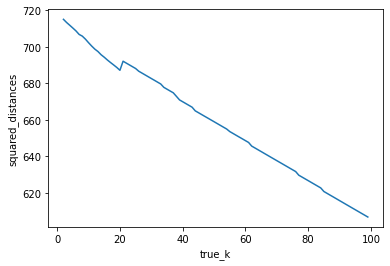

In [19]:
# Create a graph that has a range of k-means on the X axis and the squared distances on the Y axis.
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.probability import FreqDist 
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
 


# Produce k-means clustering for 2 - 100 clusters. 
true_k = list(range(2, 100)) 
k_attempts = [KMeans(n_clusters=n, init='k-means++', max_iter=100, n_init=1, random_state=42).fit(features) for n in true_k]
squared_distances = [model.inertia_ for model in k_attempts]
 
plt.plot(true_k, squared_distances)
plt.xlabel('true_k')
plt.ylabel('squared_distances')  
plt.show()  

In [20]:
print('k, Number of Tweets in each cluster')

for k in range(2, 42):
    print(k, [len(tokenized_data[k_attempts[k].labels_ == i]) for i in range(k)])

    
# From the print out below, you can see a very uneven distribution of tweets for many of the choices of k beginning with 36.

k, Number of Tweets in each cluster
2 [461, 170]
3 [404, 142, 45]
4 [390, 135, 43, 33]
5 [362, 122, 42, 29, 94]
6 [97, 77, 38, 86, 214, 130]
7 [91, 70, 36, 76, 199, 117, 44]
8 [89, 68, 33, 74, 198, 109, 43, 42]
9 [88, 67, 33, 74, 192, 109, 40, 41, 49]
10 [81, 57, 33, 73, 187, 103, 40, 41, 49, 24]
11 [78, 56, 30, 65, 177, 99, 38, 39, 45, 23, 17]
12 [76, 55, 30, 65, 173, 96, 38, 39, 45, 23, 17, 25]
13 [73, 55, 30, 64, 168, 96, 38, 39, 41, 23, 17, 25, 37]
14 [72, 52, 30, 63, 164, 93, 38, 39, 39, 23, 17, 21, 38, 13]
15 [65, 50, 30, 62, 159, 92, 37, 39, 38, 23, 17, 20, 38, 13, 14]
16 [65, 47, 30, 62, 153, 91, 37, 39, 37, 23, 17, 17, 38, 13, 13, 14]
17 [65, 47, 30, 62, 150, 89, 37, 39, 36, 23, 17, 17, 38, 13, 13, 14, 20]
18 [62, 44, 30, 61, 148, 86, 37, 39, 35, 23, 17, 17, 38, 13, 13, 14, 20, 16]
19 [1, 1, 1, 1, 2, 1, 704, 2, 1, 1, 1, 1, 1, 1, 1, 2, 7, 1, 1]
20 [1, 1, 1, 1, 2, 1, 703, 2, 1, 1, 1, 1, 1, 1, 1, 2, 7, 1, 1, 1]
21 [1, 1, 1, 1, 2, 1, 702, 2, 1, 1, 1, 1, 1, 1, 1, 2, 7, 1, 1, 1, 2]


In [21]:
# We will create a centers_list consisting of the cluster number, the word, and its coefficient.
k = 36

K_model = k_attempts[k-2]

# We will figure out what the cluster_centers_ means
centers_list = []
(nz_rows, nz_cols) = np.nonzero(K_model.cluster_centers_)

for (i, j) in zip(nz_rows, nz_cols):
    cluster = i
    word = word_by_index[j]
    coefficient = K_model.cluster_centers_[i,j]
    print('cluster: {0:0.0f} {1:>30s} coefficient: {2:0.4f}'.format(cluster,word,coefficient))
    centers_list.append([cluster, word, coefficient])

    
# What we see is that the coefficients in the cluster_centers vector is the weight that 
# is placed on each of the words in the tweet to find the center of the cluster in the 5453 dimensional
# space of the model

# for example the center of cluster 0 is whose first word is 'abroad' and last word is 'yet' would be at:

# y_cluster_zero = 0.0161 * x_abroad + 0.0185 * x_abruptly + 0.0111 * x_action + ... + 0.0100 * x_yet

cluster: 0                     california coefficient: 0.3590
cluster: 0                        college coefficient: 0.3267
cluster: 0                         events coefficient: 0.3356
cluster: 0                         played coefficient: 0.3757
cluster: 0                     spectators coefficient: 0.3991
cluster: 0                       sporting coefficient: 0.3991
cluster: 0                         update coefficient: 0.3006
cluster: 0                        without coefficient: 0.3190
cluster: 1                          covid coefficient: 0.2018
cluster: 1                        details coefficient: 0.2621
cluster: 1                          donor coefficient: 0.3022
cluster: 1                     guidelines coefficient: 0.2718
cluster: 1                      humanmilk coefficient: 0.3022
cluster: 1                       includes coefficient: 0.2844
cluster: 1                       measures coefficient: 0.2621
cluster: 1                    milkbanking coefficient: 0.3022
cluster:

cluster: 6                        helping coefficient: 0.0006
cluster: 6                          henry coefficient: 0.0010
cluster: 6                       hermanos coefficient: 0.0006
cluster: 6                           hero coefficient: 0.0003
cluster: 6                        hervida coefficient: 0.0003
cluster: 6                            het coefficient: 0.0003
cluster: 6                            hey coefficient: 0.0011
cluster: 6                      hezbollah coefficient: 0.0007
cluster: 6                             hi coefficient: 0.0004
cluster: 6                           hice coefficient: 0.0003
cluster: 6                       hicieron coefficient: 0.0004
cluster: 6                           hide coefficient: 0.0005
cluster: 6                         hiding coefficient: 0.0003
cluster: 6                           hier coefficient: 0.0002
cluster: 6                       hiervoor coefficient: 0.0003
cluster: 6                           high coefficient: 0.0020
cluster:

cluster: 6                        salvini coefficient: 0.0006
cluster: 6               salvinifiniscila coefficient: 0.0003
cluster: 6               salvinisciacallo coefficient: 0.0003
cluster: 6              salvinivergognati coefficient: 0.0003
cluster: 6                         sampai coefficient: 0.0005
cluster: 6                        samples coefficient: 0.0009
cluster: 6                            san coefficient: 0.0009
cluster: 6                      sanctions coefficient: 0.0009
cluster: 6                        sanders coefficient: 0.0010
cluster: 6                          sands coefficient: 0.0007
cluster: 6                        sanidad coefficient: 0.0003
cluster: 6                      sanitaria coefficient: 0.0014
cluster: 6                      sanitario coefficient: 0.0007
cluster: 6                       sanitary coefficient: 0.0004
cluster: 6                       sanitise coefficient: 0.0005
cluster: 6                      sanitizer coefficient: 0.0006
cluster:

In [22]:
# We will create a dataframe based on the cluster centers.
cols = ['cluster','word','coefficient']

df_centers = pd.DataFrame(centers_list, columns=cols)

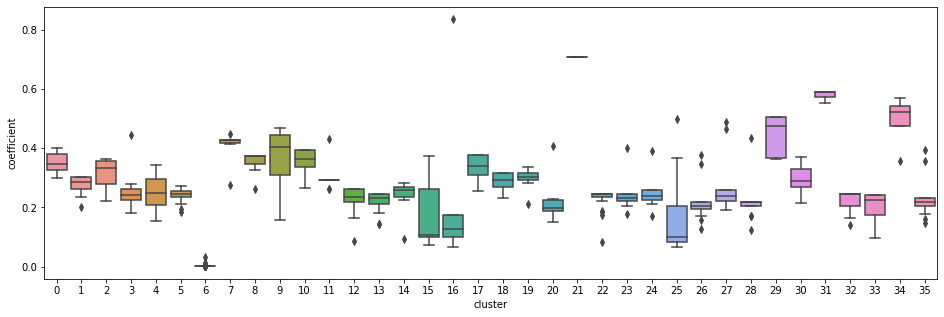

In [23]:
# We will look at the centers coefficients to see if there is a pattern across clusters. In this case there is none.

import seaborn as sns
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(111)


sns.boxplot(x='cluster',y='coefficient',data=df_centers, ax=ax)

In [24]:
search_word = 'telemedicine'
for K in range(k):
    tweets = data['Tweet'][k_attempts[k-2].labels_== K]
    for i in range(len(tweets)):
        tweet = tweets.iloc[i].strip()
        tweet_words = [w.strip() for w in tweet.split()]
        if search_word in tweet_words:
            print('found "',search_word, '" in cluster', K, 'tweet number', i, ': \n"', tweet, '"\n\n')


found " telemedicine " in cluster 6 tweet number 433 : 
" watch vice president pence on american insurance companies committing to waive copays cover coronavirus treatment costs ensure no surprise billing and encourage telemedicine "




We can thus see that telemedicine is connected with cost which is a factor to be taken into account. The file data.csv is a subset of the covid-19_tweets.csv file from the covid-19 tweets dataset. When the full tweets file is utilized, there are multiple clusters with the word telemedicine associated with cost related terms.